In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt   
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
df_merged = pd.read_csv("../Data/daily_weather_merged.csv")

In [64]:
df_merged.head()

,Unnamed: 0,day,LCLid,energy_sum,energy_mean,energy_max,energy_min,energy_std,energy_count,dayTime,visibility,temperatureMin,temperatureMax,icon,cloudCover,moonPhase
0,0,2011-11-23,MAC000149,2.287,0.081679,0.198,0.000,0.052851,28,8.52,8.06,3.81,10.36,fog,0.36,0.94
1,1,2011-11-23,MAC000154,5.798,0.252087,0.999,0.098,0.219155,23,8.52,8.06,3.81,10.36,fog,0.36,0.94
2,2,2011-11-23,MAC000156,6.523,0.296500,0.512,0.162,0.108046,22,8.52,8.06,3.81,10.36,fog,0.36,0.94
3,3,2011-11-23,MAC000150,9.254,0.330500,1.162,0.059,0.313498,28,8.52,8.06,3.81,10.36,fog,0.36,0.94
4,4,2011-11-23,MAC000147,3.036,0.108429,0.315,0.033,0.071653,28,8.52,8.06,3.81,10.36,fog,0.36,0.94


In [65]:
df_merged = df_merged.drop(columns = ['energy_mean',
                                        'energy_max',   
                                        'energy_min',      
                                        'energy_std',     
                                        'energy_count'
                                     ])

In [66]:
df_merged = (df_merged.groupby(['day'])
            .mean()
            .sort_values('day')
            .reset_index()
            .drop(columns = ['Unnamed: 0'])
            )

In [67]:
df_merged.head()

,day,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
0,2011-11-23,6.952692,8.520000,8.06,3.81,10.36,0.36,0.94
1,2011-11-24,8.536480,8.476111,10.64,8.56,12.93,0.41,0.97
2,2011-11-25,9.499781,8.433333,12.38,7.46,13.03,0.48,0.01
3,2011-11-26,10.267707,8.391944,13.07,7.01,12.96,0.44,0.05
4,2011-11-27,10.850805,8.351667,13.08,4.47,13.54,0.42,0.08


In [68]:
df_merged.corr()

,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
energy_sum,1.000000,-0.768339,-0.245011,-0.804079,-0.843281,0.240353,-0.033909
dayTime,-0.768339,1.000000,0.198165,0.632180,0.694892,-0.129595,0.019402
visibility,-0.245011,0.198165,1.000000,0.191942,0.261507,-0.332863,0.061707
temperatureMin,-0.804079,0.632180,0.191942,1.000000,0.896142,-0.062109,-0.013204
temperatureMax,-0.843281,0.694892,0.261507,0.896142,1.000000,-0.333338,0.005851
cloudCover,0.240353,-0.129595,-0.332863,-0.062109,-0.333338,1.000000,-0.064122
moonPhase,-0.033909,0.019402,0.061707,-0.013204,0.005851,-0.064122,1.000000


In [69]:
df_merged.corr()['energy_sum']

energy_sum        1.000000
dayTime          -0.768339
visibility       -0.245011
temperatureMin   -0.804079
temperatureMax   -0.843281
cloudCover        0.240353
moonPhase        -0.033909
Name: energy_sum, dtype: float64

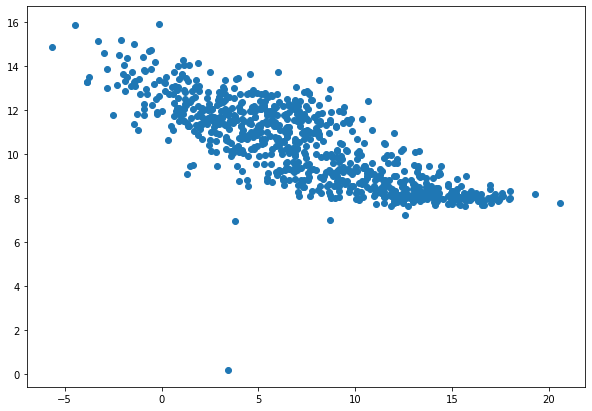

In [70]:
plt.figure(figsize=(10,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])

In [71]:
df_merged.loc[df_merged["energy_sum"] < 2]

,day,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
826,2014-02-28,0.208997,10.829167,10.8,3.43,7.35,0.67,0.97


In [72]:
df_merged.drop(index = 826, inplace = True)

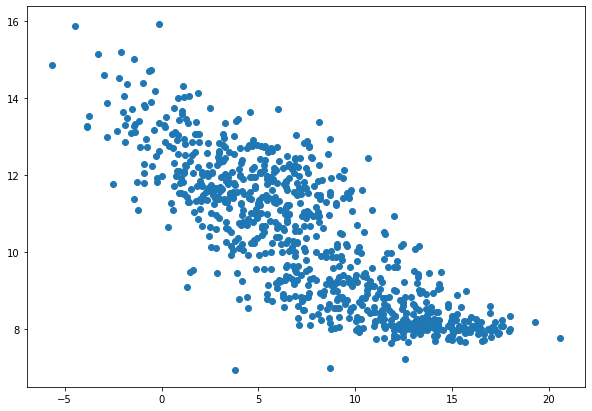

In [73]:
plt.figure(figsize=(10,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])

In [74]:
regressor1 = LinearRegression()
regressor1.fit(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])

LinearRegression()

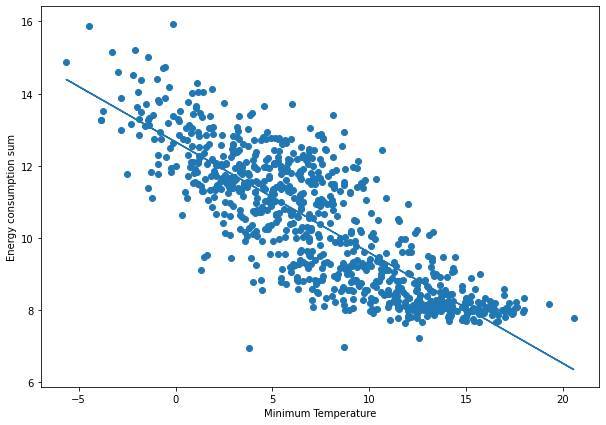

In [93]:
plt.figure(figsize=(10,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])
plt.xlabel("Minimum Temperature")
plt.ylabel("Energy consumption sum")
plt.plot(df_merged[["temperatureMin"]], regressor1.predict(df_merged[["temperatureMin"]]))

In [101]:
future_predict = np.array(range(21, 36))
future_predict = future_predict.reshape(-1, 1)
future = regressor1.predict(future_predict)
print(future)

[[6.21668318]
 [5.90975512]
 [5.60282707]
 [5.29589901]
 [4.98897095]
 [4.68204289]
 [4.37511483]
 [4.06818677]
 [3.76125871]
 [3.45433065]
 [3.14740259]
 [2.84047453]
 [2.53354647]
 [2.22661842]
 [1.91969036]]


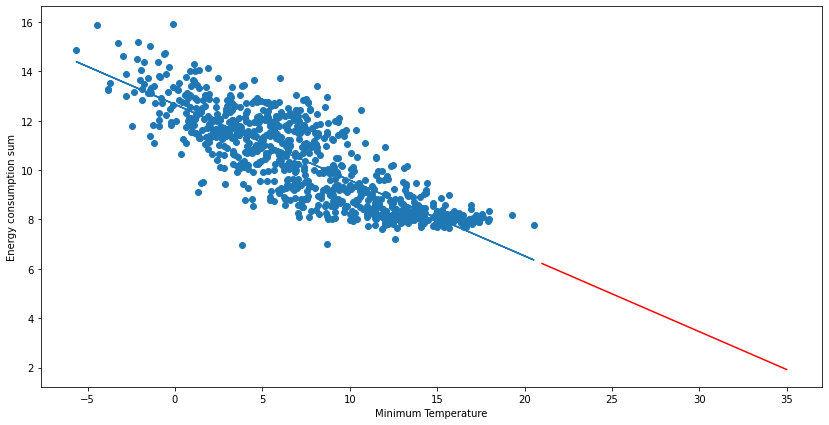

In [102]:
plt.figure(figsize=(14,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])
plt.xlabel("Minimum Temperature")
plt.ylabel("Energy consumption sum")
plt.plot(df_merged[["temperatureMin"]], regressor1.predict(df_merged[["temperatureMin"]]))
plt.plot(future_predict, future, color="r")

In [95]:
future = regressor1.predict(future_predict)
print(future)

[[6.21668318]
 [5.90975512]
 [5.60282707]
 [5.29589901]
 [4.98897095]
 [4.68204289]
 [4.37511483]
 [4.06818677]
 [3.76125871]
 [3.45433065]
 [3.14740259]
 [2.84047453]
 [2.53354647]
 [2.22661842]]


In [76]:
print(regressor1.score(df_merged[["temperatureMin"]], df_merged[["energy_sum"]]))
print(regressor1.intercept_)
print(regressor1.coef_)

0.6793836000812431
[12.66217242]
[[-0.30692806]]


In [82]:
df_merged.loc[df_merged["temperatureMin"] > 20]

,const,day,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
268,1.0,2012-08-17,7.773145,14.432222,12.87,20.54,29.86,0.23,0.03


In [90]:
future_predict = np.array(range(21, 35))
future_predict = future_predict.reshape(-1, 1)

In [91]:
future = regressor1.predict(future_predict)

In [77]:
regressor2 = LinearRegression()
regressor2.fit(df_merged[["dayTime"]], df_merged[["energy_sum"]])

LinearRegression()

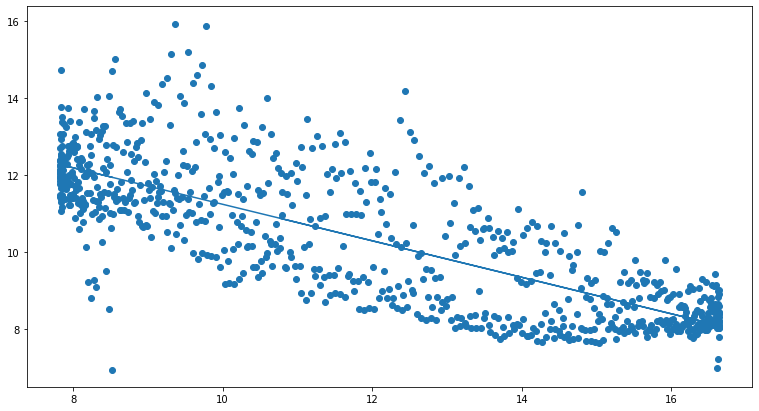

In [78]:
plt.figure(figsize=(13,7))
plt.scatter(df_merged[["dayTime"]], df_merged[["energy_sum"]])
plt.plot(df_merged[["dayTime"]], regressor2.predict(df_merged[["dayTime"]]))

In [79]:
print(regressor2.score(df_merged[["dayTime"]], df_merged[["energy_sum"]]))
print(regressor2.intercept_)
print(regressor2.coef_)

0.6153025084750338
[15.98837794]
[[-0.47433065]]


In [80]:
df_merged = sm.add_constant(df_merged)
df_merged_y = df_merged["energy_sum"]
df_merged_x = df_merged[['const','dayTime', 'temperatureMin']]
df_merged_ols = sm.OLS(df_merged_y, df_merged_x).fit()
df_merged_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             energy_sum   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1595.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          7.31e-284
Time:                        20:17:17   Log-Likelihood:                -1027.8
No. Observations:                 826   AIC:                             2062.
Df Residuals:                     823   BIC:                             2076.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.0332      0.122    123.109      0.000      14.793      15.273
dayTime           -0.2653      0.012    -21.531      0.000      -0.289      -0.241
temperatureMin    -0.2037      0.008    -26.847      0.000      -0.219      -0.189
==============================================================================
Omnibus:                       43.444   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.613
Skew:                          -0.097   Prob(JB):                     1.77e-31
Kurtosis:                       5.019   Cond. No.                         62.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""